# Basic imports

In [98]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read data from csv

**Pandas - [pd.read_csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)**

In [99]:
sms = pd.read_csv('spam.csv',encoding='latin-1')

In [100]:
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Seems like the three last columns dont have any information

**Step one**: Remove the useless columns


**Step Two**: Rename the *v1* and *v2* columns to *class* and *text*, respectively

In [101]:
sms.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)
sms.columns = ['Class','Text']

In [102]:
sms.head()

,Class,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Lets see some information about the data



In [103]:
sms['text_len'] = sms['Text'].map(len)

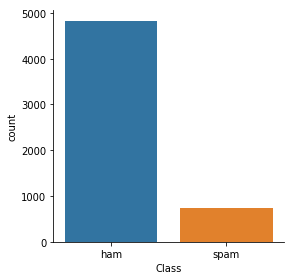

In [104]:
sns.factorplot('Class',data=sms,kind='count')

In [105]:
sms.groupby(['Class']).mean()

,text_len
Class,
ham,71.023627
spam,138.866131


# Approach #1


Lets use the **Bag-of-Words** and **Naive Bayes** 

This will count the frequency of the words, which will be our features in this case

**[Udacity - Bag of Words - Intro to Machine Learning](https://www.youtube.com/watch?v=OGK9SHt8SWg)**


**[Sklearn - CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)**

**[Sklearn - Train-Test-Split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)**

**[Sklearn - PipeLine](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)**

In [167]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [168]:
def pre_processing(document):
    tokens = word_tokenize(document)
    return [word for word in tokens if word not in stopwords.words('english')]

In [169]:
x_train, x_test, y_train, y_test = train_test_split(
    np.ravel(sms['Text']),
    np.ravel(sms['Class']),
    random_state=3
)

In [170]:
pipe = Pipeline([
    ('bow',CountVectorizer(analyzer=pre_processing)),
    ('classifier',MultinomialNB())    
])

In [171]:
pipe.fit(x_train,y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function pre_processing at 0x7f9671cbd400>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=...None, vocabulary=None)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [172]:
predicts = pipe.predict(x_test)

In [173]:
print(classification_report(predicts,y_test))

             precision    recall  f1-score   support

        ham       1.00      0.98      0.99      1210
       spam       0.90      0.98      0.94       183

avg / total       0.98      0.98      0.98      1393



# Approach #2

Use of **TD-IDF** and **Naive-Bayes**


**[Sklearn - TF-IDF](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)**


**[Udacity - Weighting by Term Frequency - Intro to Machine Learning](https://www.youtube.com/watch?v=t2Nq3MFK_pg) **

In [174]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [175]:
pipe2 = Pipeline([
    ('tdidf',TfidfVectorizer(analyzer=pre_processing)),
    ('classifier',MultinomialNB()),
])

In [176]:
pipe2.fit(x_train,y_train)

Pipeline(memory=None,
     steps=[('tdidf', TfidfVectorizer(analyzer=<function pre_processing at 0x7f9671cbd400>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), norm='l2',
...      vocabulary=None)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [177]:
predict2 = pipe2.predict(x_test)

In [178]:
print(classification_report(predict2,y_test))

             precision    recall  f1-score   support

        ham       1.00      0.95      0.97      1258
       spam       0.68      1.00      0.81       135

avg / total       0.97      0.95      0.96      1393

